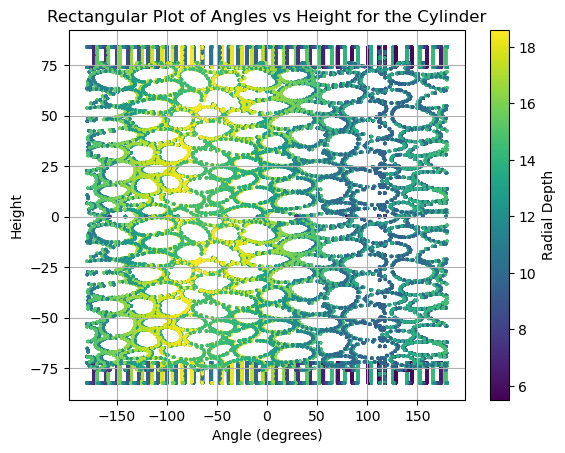

In [20]:
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt

# Load the STL file
mesh_data = mesh.Mesh.from_file('testcylinder.stl')

# Extract vertices
vertices = mesh_data.vectors

# Calculate the center of the cylinder
center = np.mean(vertices, axis=(0, 1))

# Calculate the angles from the starting plane (in radians)
angles = np.arctan2(vertices[:, :, 1] - center[1], vertices[:, :, 0] - center[0])

# Convert angles from radians to degrees
angles_degrees = np.degrees(angles)

# Calculate the height of each vertex along the central axis
heights = vertices[:, :, 2] - center[2]

# Calculate horizontal distances (distances from the center in the xy plane)
horizontal_distances = np.sqrt((vertices[:, :, 0] - center[0])**2 + (vertices[:, :, 1] - center[1])**2)

# Create a rectangular plot with angles as x-values, heights as y-values, and horizontal_distances as the color
plt.scatter(angles_degrees, heights, c=horizontal_distances, marker='o', s=2, cmap='viridis')

plt.title('Rectangular Plot of Angles vs Height for the Cylinder')
plt.xlabel('Angle (degrees)')
plt.ylabel('Height')
plt.grid(True)
plt.colorbar(label='Radial Depth')

plt.show()


/var/folders/l_/8cthhgwn67307pr8kgdwzkt00000gq/T/ipykernel_86109/4111558860.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gray')


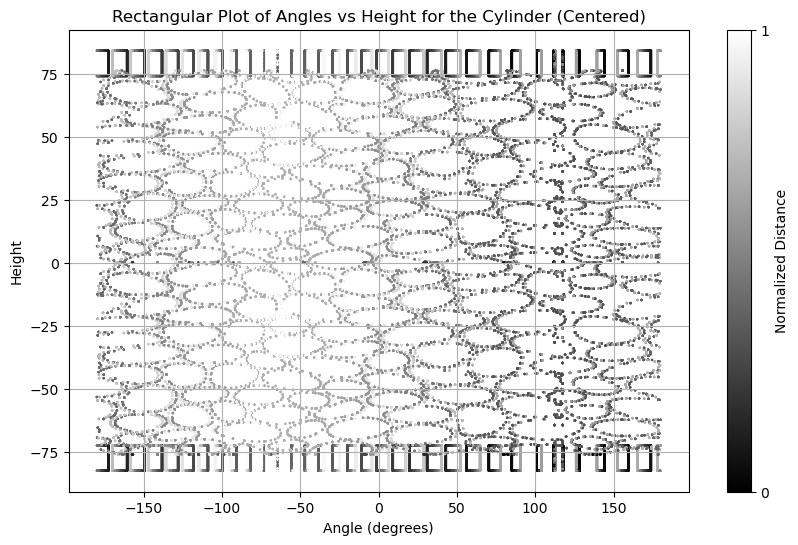

In [23]:
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt

# Load the STL file
mesh_data = mesh.Mesh.from_file('testcylinder.stl')

# Extract vertices
vertices = mesh_data.vectors

# Calculate the center of the cylinder
center = np.mean(vertices, axis=(0, 1))

# Shift the vertices to center them around (0, 0, 0)
vertices -= center

# Calculate the angles from the starting plane (in radians)
angles = np.arctan2(vertices[:, :, 1], vertices[:, :, 0])

# Convert angles from radians to degrees
angles_degrees = np.degrees(angles)

# Calculate the height of each vertex along the central axis
heights = vertices[:, :, 2]

# Calculate horizontal distances (distances from the center in the xy plane)
horizontal_distances = np.sqrt(vertices[:, :, 0] ** 2 + vertices[:, :, 1] ** 2)

# Normalize the horizontal distances to the range [0, 1]
normalized_distances = (horizontal_distances - np.min(horizontal_distances)) / (np.max(horizontal_distances) - np.min(horizontal_distances))

# Create a grayscale colormap
cmap = plt.cm.get_cmap('gray')

# Set a larger figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a rectangular plot with angles as x-values, heights as y-values, and grayscale color based on normalized distances
plt.scatter(angles_degrees, heights, c=normalized_distances, cmap=cmap, marker='o', s=0.5)

plt.title('Rectangular Plot of Angles vs Height for the Cylinder (Centered)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Height')
plt.grid(True)
plt.colorbar(label='Normalized Distance', ticks=[0, 1])

plt.show()


In [29]:
# Create new vertices
new_vertices = np.stack((angles_degrees, heights, normalized_distances), axis=-1)

In [34]:
from stl import mesh

# Assuming you have already calculated new_vertices
vertices = new_vertices.reshape(-1, 3, 3)

# Create the mesh
new_mesh = mesh.Mesh(np.zeros(vertices.shape[0], dtype=mesh.Mesh.dtype))

# Set the vertices of the mesh
for i, vertex in enumerate(vertices):
    new_mesh.vectors[i] = vertex

# Save the mesh to an STL file
new_mesh.save('new_cylinder.stl')
